<a href="https://colab.research.google.com/github/muhammedkoussa/ExploratoryDataAnalysis/blob/main/Ke%C5%9Fifsel_Veri_Analizi_%C3%96devi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1. keşifsel veri analizi için gerekli kütüphaneleri içe aktarma

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Veri Setini Yükleme

In [ ]:

# Veri setini yükleme
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)


In [ ]:
 #ilk 5 satır
df.head(5)               

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
#son 5 satır
df.tail(5)                        

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75




---



## 3. Veri türlerinin kontrol edilmesi

In [ ]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object



---



## 4. eğer varsa aynı olan satırların silinmesi



In [ ]:
df.shape

(887, 8)

gereksiz olan sutünleri silme

In [ ]:
df=df.drop(['Parents/Children Aboard'], axis=1)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [ ]:
df.count()      

Survived                   887
Pclass                     887
Name                       887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
Fare                       887
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
df.count()

Survived                   887
Pclass                     887
Name                       887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
Fare                       887
dtype: int64



---



## 7. Eksik Değerlerin kontrol edilmesi

In [ ]:
print(df.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


Eksik veri çıkmadı

## 8. Aykırı değerlerin Tespit edilmesi

<AxesSubplot:xlabel='Age'>

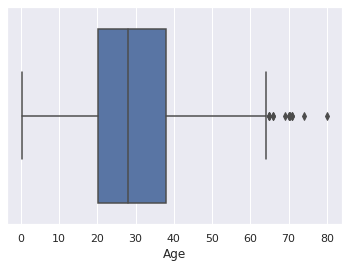

In [ ]:
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Fare'>

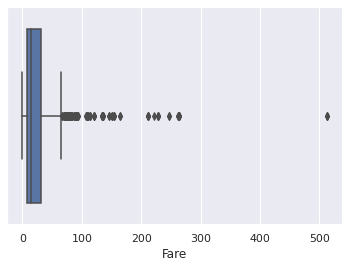

In [ ]:
sns.boxplot(x=df['Fare'])

<AxesSubplot:xlabel='Pclass'>

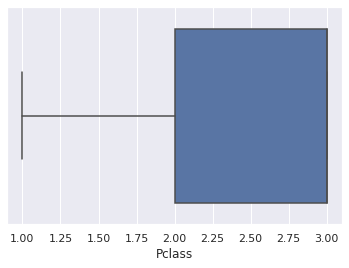

In [ ]:
sns.boxplot(x=df['Pclass'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Survived                    1.0000
Pclass                      1.0000
Age                        17.7500
Siblings/Spouses Aboard     1.0000
Parents/Children Aboard     0.0000
Fare                       23.2125
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-32-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(592, 8)

In [ ]:
df.count

<bound method DataFrame.count of      Survived  Pclass                                         Name     Sex  \
0           0       3                       Mr. Owen Harris Braund    male   
2           1       3                        Miss. Laina Heikkinen  female   
3           1       1  Mrs. Jacques Heath (Lily May Peel) Futrelle  female   
4           0       3                      Mr. William Henry Allen    male   
5           0       3                              Mr. James Moran    male   
..        ...     ...                                          ...     ...   
880         0       3                        Mr. Henry Jr Sutehall    male   
882         0       2                         Rev. Juozas Montvila    male   
883         1       1                  Miss. Margaret Edith Graham  female   
885         1       1                         Mr. Karl Howell Behr    male   
886         0       3                           Mr. Patrick Dooley    male   

      Age  Siblings/Spouses Ab

Aykırı olan değerler silindi



---



## 9. Histogram

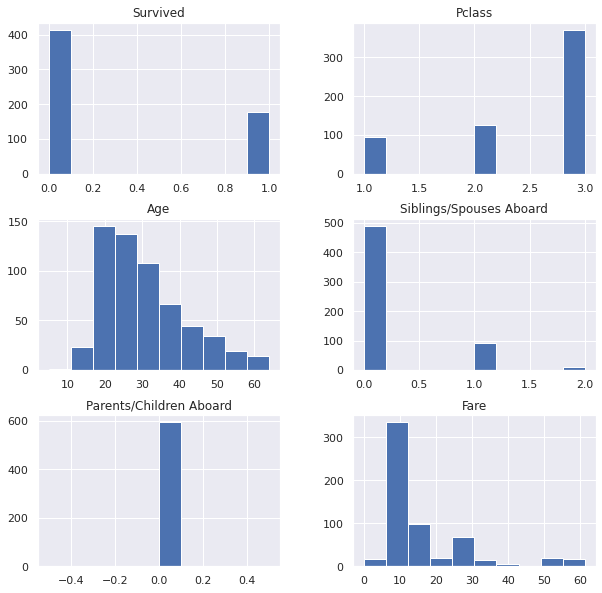

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(10,10))
plt.show()

### Heat Maps


,Survived,Pclass,Age,Siblings/Spouses Aboard,Fare
Survived,1.000000,-0.214658,-0.010508,0.095609,0.254424
Pclass,-0.214658,1.000000,-0.476876,-0.053974,-0.678311
Age,-0.010508,-0.476876,1.000000,-0.043303,0.323097
Siblings/Spouses Aboard,0.095609,-0.053974,-0.043303,1.000000,0.330497
Fare,0.254424,-0.678311,0.323097,0.330497,1.000000


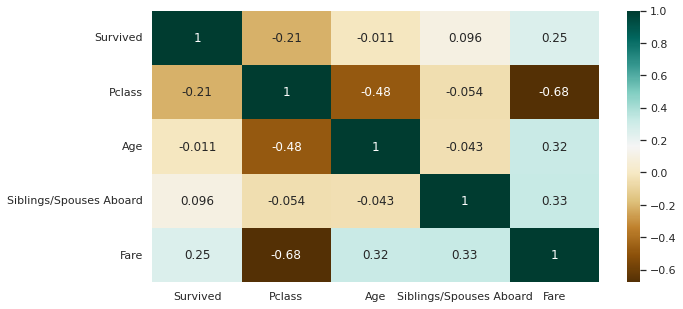

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot


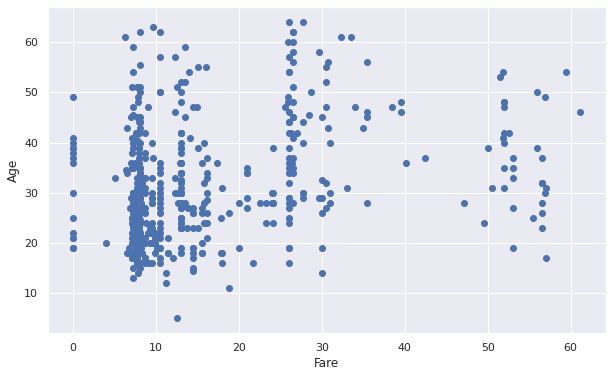

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Fare'], df['Age'])
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
plt.show()